In [1]:
import time
import numpy as np
import pandas as pd

from scipy import sparse
from scipy.stats.mstats import gmean
from datetime import datetime
from sklearn import preprocessing
from scipy.stats import skew, boxcox,boxcox_normmax
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
# from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from bayes_opt import BayesianOptimization
from sklearn.metrics import log_loss

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import xgboost as xgb

seed = 1234

# Load Data

In [2]:
train_y = np.ravel(pd.read_csv('../input/' + 'labels_BrandenMurray.csv'))

names = ['low_0','medium_0','high_0',
        'low_1','medium_1','high_1',
        'low_2','medium_2','high_2',
        'low_3','medium_3','high_3',
        'low_4','medium_4','high_4',
        'low_5','medium_5','high_5',
        'low_6','medium_6','high_6',
        'low_7','medium_7','high_7',
        'low_8','medium_8','high_8',
        'low_9','medium_9','high_9']

data_path = "../2nd/"
total_col = 0

In [3]:
# RFC 1st level 
file_train      = 'train_blend_RFC_gini_BM_MB_add03052240_2017-03-10-22-02' + '.csv'
file_test_mean  = 'test_blend_RFC_gini_mean_BM_MB_add03052240_2017-03-10-22-02' + '.csv'
file_test_gmean = 'test_blend_RFC_gini_gmean_BM_MB_add03052240_2017-03-10-22-02' + '.csv'

train_rfc_gini      = pd.read_csv(data_path + file_train,      header = None)
test_rfc_gini_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_rfc_gini_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_rfc_gini.shape[1]
total_col += n_column

train_rfc_gini.columns      = ['rfc_gini_' + x for x in names[:n_column]]
test_rfc_gini_mean.columns  = ['rfc_gini_' + x for x in names[:n_column]]
test_rfc_gini_gmean.columns = ['rfc_gini_' + x for x in names[:n_column]]

file_train      = 'train_blend_RFC_entropy_BM_MB_add03052240_2017-03-10-21-10' + '.csv'
file_test_mean  = 'test_blend_RFC_entropy_mean_BM_MB_add03052240_2017-03-10-21-10' + '.csv'
file_test_gmean = 'test_blend_RFC_entropy_gmean_BM_MB_add03052240_2017-03-10-21-10' + '.csv'

train_rfc_entropy      = pd.read_csv(data_path + file_train,      header = None)
test_rfc_entropy_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_rfc_entropy_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_rfc_entropy.shape[1]
total_col += n_column

train_rfc_entropy.columns      = ['rfc_entropy_' + x for x in names[:n_column]]
test_rfc_entropy_mean.columns  = ['rfc_entropy_' + x for x in names[:n_column]]
test_rfc_entropy_gmean.columns = ['rfc_entropy_' + x for x in names[:n_column]]



print 'train_rfc_gini: {}\t test_rfc_gini_mean:{}\t test_rfc_gini_gmean:{}'.\
        format(train_rfc_gini.shape,test_rfc_gini_mean.shape,test_rfc_gini_gmean.shape)
print '\ntrain_rfc_entropy: {}\t test_rfc_entropy_mean:{}\t test_rfc_entropy_gmean:{}'.\
        format(train_rfc_entropy.shape,test_rfc_entropy_mean.shape,test_rfc_entropy_gmean.shape)

    
print '\ntrain_rfc_gini'
print train_rfc_gini.iloc[:5,:3]
print '\ntrain_rfc_entropy'
print train_rfc_entropy.iloc[:5,:3]



train_rfc_gini: (49352, 3)	 test_rfc_gini_mean:(74659, 3)	 test_rfc_gini_gmean:(74659, 3)

train_rfc_entropy: (49352, 3)	 test_rfc_entropy_mean:(74659, 3)	 test_rfc_entropy_gmean:(74659, 3)

train_rfc_gini
   rfc_gini_low_0  rfc_gini_medium_0  rfc_gini_high_0
0        0.543090           0.387824         0.069086
1        0.431967           0.501843         0.066191
2        0.796826           0.180090         0.023085
3        0.671667           0.274519         0.053815
4        0.931788           0.064494         0.003718

train_rfc_entropy
   rfc_entropy_low_0  rfc_entropy_medium_0  rfc_entropy_high_0
0           0.542659              0.393322            0.064019
1           0.464249              0.477816            0.057935
2           0.799674              0.184329            0.015997
3           0.686509              0.278618            0.034872
4           0.966726              0.029282            0.003992


In [4]:
# RFC 1st level 0322
file_train      = 'train_blend_RFC_gini_BM_0322_2017-03-22-17-12' + '.csv'
file_test_mean  = 'test_blend_RFC_gini_mean_BM_0322_2017-03-22-17-12' + '.csv'
file_test_gmean = 'test_blend_RFC_gini_gmean_BM_0322_2017-03-22-17-12' + '.csv'

train_rfc_gini_0322      = pd.read_csv(data_path + file_train,      header = None)
test_rfc_gini_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_rfc_gini_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_rfc_gini_0322.shape[1]
total_col += n_column

train_rfc_gini_0322.columns      = ['rfc_gini_0322_' + x for x in names[:n_column]]
test_rfc_gini_mean_0322.columns  = ['rfc_gini_0322_' + x for x in names[:n_column]]
test_rfc_gini_gmean_0322.columns = ['rfc_gini_0322_' + x for x in names[:n_column]]


file_train      = 'train_blend_RFC_entropy_BM_0322_2017-03-22-16-02' + '.csv'
file_test_mean  = 'test_blend_RFC_entropy_mean_BM_0322_2017-03-22-16-02' + '.csv'
file_test_gmean = 'test_blend_RFC_entropy_gmean_BM_0322_2017-03-22-16-02' + '.csv'

train_rfc_entropy_0322      = pd.read_csv(data_path + file_train,      header = None)
test_rfc_entropy_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_rfc_entropy_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_rfc_entropy_0322.shape[1]
total_col += n_column

train_rfc_entropy_0322.columns      = ['rfc_entropy_0322_' + x for x in names[:n_column]]
test_rfc_entropy_mean_0322.columns  = ['rfc_entropy_0322_' + x for x in names[:n_column]]
test_rfc_entropy_gmean_0322.columns = ['rfc_entropy_0322_' + x for x in names[:n_column]]


print '\ntrain_rfc_entropy: {}\t test_rfc_entropy_mean:{}\t test_rfc_entropy_gmean:{}'.\
        format(train_rfc_gini_0322.shape,test_rfc_gini_mean_0322.shape,test_rfc_gini_gmean_0322.shape)
print '\ntrain_rfc_entropy: {}\t test_rfc_entropy_mean:{}\t test_rfc_entropy_gmean:{}'.\
        format(train_rfc_entropy_0322.shape,test_rfc_entropy_mean_0322.shape,test_rfc_entropy_gmean_0322.shape)
    
    
print '\ntrain_rfc_gini_0322'
print train_rfc_gini_0322.iloc[:5,:3]
print '\ntrain_rfc_entropy_0322'
print train_rfc_entropy_0322.iloc[:5,:3]


train_rfc_entropy: (49352, 3)	 test_rfc_entropy_mean:(74659, 3)	 test_rfc_entropy_gmean:(74659, 3)

train_rfc_entropy: (49352, 3)	 test_rfc_entropy_mean:(74659, 3)	 test_rfc_entropy_gmean:(74659, 3)

train_rfc_gini_0322
   rfc_gini_0322_low_0  rfc_gini_0322_medium_0  rfc_gini_0322_high_0
0             0.529595                0.404298              0.066107
1             0.439197                0.489992              0.070812
2             0.792970                0.189331              0.017699
3             0.675457                0.276198              0.048345
4             0.951710                0.043953              0.004337

train_rfc_entropy_0322
   rfc_entropy_0322_low_0  rfc_entropy_0322_medium_0  rfc_entropy_0322_high_0
0                0.551613                   0.396561                 0.051826
1                0.430922                   0.511564                 0.057514
2                0.788894                   0.201162                 0.009943
3                0.675501    

In [5]:
# LR 1st level
file_train = 'train_blend_LR_BM_2017-03-09-02-38' + '.csv'
file_test_mean = 'test_blend_LR_mean_BM_2017-03-09-02-38' + '.csv'
file_test_gmean = 'test_blend_LR_gmean_BM_2017-03-09-02-38' + '.csv'

train_LR      = pd.read_csv(data_path + file_train, header = None)
test_LR_mean  = pd.read_csv(data_path + file_test_mean, header = None)
test_LR_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_LR.shape[1]
total_col += n_column

train_LR.columns      = ['LR_' + x for x in names[:n_column]]
test_LR_mean.columns  = ['LR_' + x for x in names[:n_column]]
test_LR_gmean.columns = ['LR_' + x for x in names[:n_column]]

print 'train_LR: {}\t test_LR_mean:{}\t test_LR_gmean:{}'.\
        format(train_LR.shape,test_LR_mean.shape,test_LR_gmean.shape)

print '\ntrain_LR'
print train_LR.iloc[:5,:3]




train_LR: (49352, 21)	 test_LR_mean:(74659, 21)	 test_LR_gmean:(74659, 21)

train_LR
   LR_low_0  LR_medium_0  LR_high_0
0  0.422874     0.486259   0.090867
1  0.321009     0.599539   0.079452
2  0.655066     0.315023   0.029912
3  0.711200     0.252680   0.036120
4  0.902499     0.090717   0.006784


In [6]:
# LR 1st level 0322
file_train = 'train_blend_LR_BM_0322_2017-03-22-23-38' + '.csv'
file_test_mean = 'test_blend_LR_mean_BM_0322_2017-03-22-23-38' + '.csv'
file_test_gmean = 'test_blend_LR_gmean_BM_0322_2017-03-22-23-38' + '.csv'

train_LR_0322      = pd.read_csv(data_path + file_train, header = None)
test_LR_mean_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_LR_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_LR_0322.shape[1]
total_col += n_column

train_LR_0322.columns      = ['LR_0322_' + x for x in names[:n_column]]
test_LR_mean_0322.columns  = ['LR_0322_' + x for x in names[:n_column]]
test_LR_gmean_0322.columns = ['LR_0322_' + x for x in names[:n_column]]

print 'train_LR_0322: {}\t test_LR_mean_0322:{}\t test_LR_gmean_0322:{}'.\
        format(train_LR_0322.shape,test_LR_mean_0322.shape,test_LR_gmean_0322.shape)

print '\ntrain_LR_0322'
print train_LR_0322.iloc[:5,:3]

train_LR_0322: (49352, 21)	 test_LR_mean_0322:(74659, 21)	 test_LR_gmean_0322:(74659, 21)

train_LR_0322
   LR_0322_low_0  LR_0322_medium_0  LR_0322_high_0
0       0.406942          0.518465        0.074592
1       0.333177          0.579416        0.087407
2       0.636033          0.314385        0.049582
3       0.647588          0.313159        0.039253
4       0.899655          0.093021        0.007324


In [7]:
# ET 1st level
file_train      = 'train_blend_ET_gini_BM_2017-03-10-09-42' + '.csv'
file_test_mean  = 'test_blend_ET_gini_mean_BM_2017-03-10-09-42' + '.csv'
file_test_gmean = 'test_blend_ET_gini_gmean_BM_2017-03-10-09-42' + '.csv'

train_ET_gini      = pd.read_csv(data_path + file_train,      header = None)
test_ET_gini_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_ET_gini_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_ET_gini.shape[1]
total_col += n_column

train_ET_gini.columns      = ['ET_gini_' + x for x in names[:n_column]]
test_ET_gini_mean.columns  = ['ET_gini_' + x for x in names[:n_column]]
test_ET_gini_gmean.columns = ['ET_gini_' + x for x in names[:n_column]]

file_train      = 'train_blend_ET_entropy_BM_2017-03-09-20-44' + '.csv'
file_test_mean  = 'test_blend_ET_entropy_mean_BM_2017-03-09-20-44' + '.csv'
file_test_gmean = 'test_blend_ET_entropy_gmean_BM_2017-03-09-20-44' + '.csv'

train_ET_entropy      = pd.read_csv(data_path + file_train,      header = None)
test_ET_entropy_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_ET_entropy_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_ET_entropy.shape[1]
total_col += n_column

train_ET_entropy.columns      = ['ET_entropy_' + x for x in names[:n_column]]
test_ET_entropy_mean.columns  = ['ET_entropy_' + x for x in names[:n_column]]
test_ET_entropy_gmean.columns = ['ET_entropy_' + x for x in names[:n_column]]

print 'train_ET_gini: {}\t test_ET_gini_mean:{}\t test_ET_gini_gmean:{}'.\
        format(train_ET_gini.shape,test_ET_gini_mean.shape,test_ET_gini_gmean.shape)
print '\ntrain_ET_entropy: {}\t test_ET_entropy_mean:{}\t test_ET_entropy_gmean:{}'.\
        format(train_ET_entropy.shape,test_ET_entropy_mean.shape,test_ET_entropy_gmean.shape)
    
    
print '\ntrain_ET_gini'
print train_ET_gini.iloc[:5,:3]
print '\ntrain_ET_entropy'
print train_ET_entropy.iloc[:5,:3]






train_ET_gini: (49352, 3)	 test_ET_gini_mean:(74659, 3)	 test_ET_gini_gmean:(74659, 3)

train_ET_entropy: (49352, 3)	 test_ET_entropy_mean:(74659, 3)	 test_ET_entropy_gmean:(74659, 3)

train_ET_gini
   ET_gini_low_0  ET_gini_medium_0  ET_gini_high_0
0       0.491197          0.458682        0.050121
1       0.350925          0.570142        0.078934
2       0.834381          0.154016        0.011603
3       0.721964          0.239236        0.038800
4       0.950719          0.042887        0.006394

train_ET_entropy
   ET_entropy_low_0  ET_entropy_medium_0  ET_entropy_high_0
0          0.520529             0.431357           0.048114
1          0.377125             0.551815           0.071060
2          0.799234             0.188755           0.012011
3          0.716421             0.248984           0.034595
4          0.925534             0.066681           0.007785


In [8]:
# ET 1st level 0322
file_train      = 'train_blend_ET_gini_BM_0322_2017-03-23-16-04' + '.csv'
file_test_mean  = 'test_blend_ET_gini_mean_BM_0322_2017-03-23-16-04' + '.csv'
file_test_gmean = 'test_blend_ET_gini_gmean_BM_0322_2017-03-23-16-04' + '.csv'

train_ET_gini_0322      = pd.read_csv(data_path + file_train,      header = None)
test_ET_gini_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_ET_gini_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_ET_gini_0322.shape[1]
total_col += n_column

train_ET_gini_0322.columns      = ['ET_gini_0322_' + x for x in names[:n_column]]
test_ET_gini_mean_0322.columns  = ['ET_gini_0322_' + x for x in names[:n_column]]
test_ET_gini_gmean_0322.columns = ['ET_gini_0322_' + x for x in names[:n_column]]

file_train      = 'train_blend_ET_entropy_BM_0322_2017-03-23-13-40' + '.csv'
file_test_mean  = 'test_blend_ET_entropy_mean_BM_0322_2017-03-23-13-40' + '.csv'
file_test_gmean = 'test_blend_ET_entropy_gmean_BM_0322_2017-03-23-13-40' + '.csv'

train_ET_entropy_0322      = pd.read_csv(data_path + file_train,      header = None)
test_ET_entropy_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_ET_entropy_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_ET_entropy_0322.shape[1]
total_col += n_column

train_ET_entropy_0322.columns      = ['ET_entropy_0322_' + x for x in names[:n_column]]
test_ET_entropy_mean_0322.columns  = ['ET_entropy_0322_' + x for x in names[:n_column]]
test_ET_entropy_gmean_0322.columns = ['ET_entropy_0322_' + x for x in names[:n_column]]

print 'train_ET_gini_0322: {}\t test_ET_gini_mean_0322:{}\t test_ET_gini_gmean_0322:{}'.\
        format(train_ET_gini_0322.shape,test_ET_gini_mean_0322.shape,test_ET_gini_gmean_0322.shape)
print '\ntrain_ET_entropy_0322: {}\t test_ET_entropy_mean_0322:{}\t test_ET_entropy_gmean_0322:{}'.\
        format(train_ET_entropy_0322.shape,test_ET_entropy_mean_0322.shape,test_ET_entropy_gmean_0322.shape)
    
    
print '\ntrain_ET_gini_0322'
print train_ET_gini_0322.iloc[:5,:3]
print '\ntrain_ET_entropy_0322'
print train_ET_entropy_0322.iloc[:5,:3]

train_ET_gini_0322: (49352, 3)	 test_ET_gini_mean_0322:(74659, 3)	 test_ET_gini_gmean_0322:(74659, 3)

train_ET_entropy_0322: (49352, 3)	 test_ET_entropy_mean_0322:(74659, 3)	 test_ET_entropy_gmean_0322:(74659, 3)

train_ET_gini_0322
   ET_gini_0322_low_0  ET_gini_0322_medium_0  ET_gini_0322_high_0
0            0.490512               0.448808             0.060680
1            0.327548               0.587699             0.084753
2            0.836561               0.149571             0.013868
3            0.699839               0.255539             0.044622
4            0.950047               0.044878             0.005074

train_ET_entropy_0322
   ET_entropy_0322_low_0  ET_entropy_0322_medium_0  ET_entropy_0322_high_0
0               0.530947                  0.423271                0.045782
1               0.342346                  0.574514                0.083140
2               0.817611                  0.172923                0.009466
3               0.709965                  0.264

In [9]:
# KNN 1st level
file_train      = 'train_blend_KNN_uniform_BM_MB_add03052240_2017-03-11-18-31' + '.csv'
file_test_mean  = 'test_blend_KNN_uniform_mean_BM_MB_add03052240_2017-03-11-18-31' + '.csv'
file_test_gmean = 'test_blend_KNN_uniform_gmean_BM_MB_add03052240_2017-03-11-18-31' + '.csv'

train_KNN_uniform      = pd.read_csv(data_path + file_train,      header = None)
test_KNN_uniform_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_KNN_uniform_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_KNN_uniform.shape[1]
total_col += n_column

train_KNN_uniform.columns      = ['KNN_uniform_' + x for x in names[:n_column]]
test_KNN_uniform_mean.columns  = ['KNN_uniform_' + x for x in names[:n_column]]
test_KNN_uniform_gmean.columns = ['KNN_uniform_' + x for x in names[:n_column]]

file_train      = 'train_blend_KNN_distance_BM_MB_add_2017-03-11-21-51' + '.csv'
file_test_mean  = 'test_blend_KNN_distance_mean_BM_MB_add_2017-03-11-21-51' + '.csv'
file_test_gmean = 'test_blend_KNN_distance_gmean_BM_MB_add_2017-03-11-21-51' + '.csv'

train_KNN_distance      = pd.read_csv(data_path + file_train,      header = None)
test_KNN_distance_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_KNN_distance_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_KNN_distance.shape[1]
total_col += n_column

train_KNN_distance.columns      = ['KNN_distance_' + x for x in names[:n_column]]
test_KNN_distance_mean.columns  = ['KNN_distance_' + x for x in names[:n_column]]
test_KNN_distance_gmean.columns = ['KNN_distance_' + x for x in names[:n_column]]

print 'train_KNN_uniform: {}\t test_KNN_uniform_mean:{}\t test_KNN_uniform_gmean:{}'.\
        format(train_KNN_uniform.shape,test_KNN_uniform_mean.shape,test_KNN_uniform_gmean.shape)
print '\ntrain_KNN_distance: {}\t test_KNN_distance_mean:{}\t test_KNN_distance_gmean:{}'.\
        format(train_KNN_distance.shape,test_KNN_distance_mean.shape,test_KNN_distance_gmean.shape)
    
print '\ntrain_KNN_uniform'
print train_KNN_uniform.iloc[:5,:3]
print '\ntrain_KNN_distance'
print train_KNN_distance.iloc[:5,:3]

train_KNN_uniform: (49352, 3)	 test_KNN_uniform_mean:(74659, 3)	 test_KNN_uniform_gmean:(74659, 3)

train_KNN_distance: (49352, 3)	 test_KNN_distance_mean:(74659, 3)	 test_KNN_distance_gmean:(74659, 3)

train_KNN_uniform
   KNN_uniform_low_0  KNN_uniform_medium_0  KNN_uniform_high_0
0              0.505                 0.390               0.105
1              0.535                 0.355               0.110
2              0.675                 0.270               0.055
3              0.555                 0.295               0.150
4              0.815                 0.155               0.030

train_KNN_distance
   KNN_distance_low_0  KNN_distance_medium_0  KNN_distance_high_0
0            0.540803               0.380577             0.078620
1            0.540929               0.347829             0.111242
2            0.666872               0.280763             0.052364
3            0.575852               0.266448             0.157700
4            0.845119               0.142102       

In [10]:
# KNN 1st level 0322
file_train      = 'train_blend_KNN_uniform_BM_0322_2017-03-24-07-31' + '.csv'
file_test_mean  = 'test_blend_KNN_uniform_mean_BM_0322_2017-03-24-07-31' + '.csv'
file_test_gmean = 'test_blend_KNN_uniform_gmean_BM_0322_2017-03-24-07-31' + '.csv'

train_KNN_uniform_0322      = pd.read_csv(data_path + file_train,      header = None)
test_KNN_uniform_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_KNN_uniform_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_KNN_uniform_0322.shape[1]
total_col += n_column

train_KNN_uniform_0322.columns      = ['KNN_uniform_0322_' + x for x in names[:n_column]]
test_KNN_uniform_mean_0322.columns  = ['KNN_uniform_0322_' + x for x in names[:n_column]]
test_KNN_uniform_gmean_0322.columns = ['KNN_uniform_0322_' + x for x in names[:n_column]]

file_train      = 'train_blend_KNN_distance_BM_0322_2017-03-25-08-17' + '.csv'
file_test_mean  = 'test_blend_KNN_distance_mean_BM_0322_2017-03-25-08-17' + '.csv'
file_test_gmean = 'test_blend_KNN_distance_gmean_BM_0322_2017-03-25-08-17' + '.csv'

train_KNN_distance_0322      = pd.read_csv(data_path + file_train,      header = None)
test_KNN_distance_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_KNN_distance_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_KNN_distance_0322.shape[1]
total_col += n_column

train_KNN_distance_0322.columns      = ['KNN_distance_0322_' + x for x in names[:n_column]]
test_KNN_distance_mean_0322.columns  = ['KNN_distance_0322_' + x for x in names[:n_column]]
test_KNN_distance_gmean_0322.columns = ['KNN_distance_0322_' + x for x in names[:n_column]]

print 'train_KNN_uniform_0322: {}\t test_KNN_uniform_mean_0322:{}\t test_KNN_uniform_gmean_0322:{}'.\
        format(train_KNN_uniform_0322.shape,test_KNN_uniform_mean_0322.shape,test_KNN_uniform_gmean_0322.shape)
print '\ntrain_KNN_distance: {}\t test_KNN_distance_mean_0322:{}\t test_KNN_distance_gmean_0322:{}'.\
        format(train_KNN_distance_0322.shape,test_KNN_distance_mean_0322.shape,test_KNN_distance_gmean_0322.shape)
    
print '\ntrain_KNN_uniform_0322'
print train_KNN_uniform_0322.iloc[:5,:3]
print '\ntrain_KNN_distance_0322'
print train_KNN_distance_0322.iloc[:5,:3]

train_KNN_uniform_0322: (49352, 15)	 test_KNN_uniform_mean_0322:(74659, 15)	 test_KNN_uniform_gmean_0322:(74659, 15)

train_KNN_distance: (49352, 15)	 test_KNN_distance_mean_0322:(74659, 15)	 test_KNN_distance_gmean_0322:(74659, 15)

train_KNN_uniform_0322
   KNN_uniform_0322_low_0  KNN_uniform_0322_medium_0  KNN_uniform_0322_high_0
0                0.531250                   0.359375                 0.109375
1                0.500000                   0.406250                 0.093750
2                0.718750                   0.250000                 0.031250
3                0.609375                   0.281250                 0.109375
4                0.890625                   0.109375                 0.000000

train_KNN_distance_0322
   KNN_distance_0322_low_0  KNN_distance_0322_medium_0  \
0                 0.536089                    0.365949   
1                 0.489625                    0.421250   
2                 0.712491                    0.256449   
3                 

In [11]:
# TFFM 1st level
file_train      = 'train_blend_FM_BM_MB_add_desc_2017-03-16-09-52' + '.csv'
file_test_mean  = 'test_blend_FM_mean_BM_MB_add_desc_2017-03-16-09-52' + '.csv'
file_test_gmean = 'test_blend_FM_gmean_BM_MB_add_desc_2017-03-16-09-52' + '.csv'

train_FM      = pd.read_csv(data_path + file_train,      header = None)
test_FM_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_FM_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_FM.shape[1]
total_col += n_column

train_FM.columns      = ['FM_' + x for x in names[:n_column]]
test_FM_mean.columns  = ['FM_' + x for x in names[:n_column]]
test_FM_gmean.columns = ['FM_' + x for x in names[:n_column]]

print 'train_FM: {}\t test_FM_mean:{}\t test_FM_gmean:{}'.\
        format(train_FM.shape,test_FM_mean.shape,test_FM_gmean.shape)

print '\ntrain_FM'
print train_FM.iloc[:5,:3]


# TFFM 1st level 0322
file_train      = 'train_blend_FM_BM_0322_2017-03-27-04-35' + '.csv'
file_test_mean  = 'test_blend_FM_mean_BM_0322_2017-03-27-04-35' + '.csv'
file_test_gmean = 'test_blend_FM_gmean_BM_0322_2017-03-27-04-35' + '.csv'

train_FM_0322      = pd.read_csv(data_path + file_train,      header = None)
test_FM_mean_0322  = pd.read_csv(data_path + file_test_mean,  header = None)
test_FM_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_FM_0322.shape[1]
total_col += n_column

train_FM_0322.columns      = ['FM_0322_' + x for x in names[:n_column]]
test_FM_mean_0322.columns  = ['FM_0322_' + x for x in names[:n_column]]
test_FM_gmean_0322.columns = ['FM_0322_' + x for x in names[:n_column]]

print 'train_FM_0322: {}\t test_FM_mean_0322:{}\t test_FM_gmean_0322:{}'.\
        format(train_FM_0322.shape,test_FM_mean_0322.shape,test_FM_gmean_0322.shape)

print '\ntrain_FM_0322'
print train_FM_0322.iloc[:5,:3]

train_FM: (49352, 3)	 test_FM_mean:(74659, 3)	 test_FM_gmean:(74659, 3)

train_FM
   FM_low_0  FM_medium_0  FM_high_0
0  0.458595     0.410776   0.130629
1  0.329965     0.537926   0.132109
2  0.767341     0.206732   0.025927
3  0.617983     0.351273   0.030744
4  0.877894     0.103967   0.018139
train_FM_0322: (49352, 3)	 test_FM_mean_0322:(74659, 3)	 test_FM_gmean_0322:(74659, 3)

train_FM_0322
   FM_0322_low_0  FM_0322_medium_0  FM_0322_high_0
0       0.460187          0.436036        0.103776
1       0.268598          0.571916        0.159486
2       0.724799          0.239351        0.035851
3       0.669683          0.286716        0.043600
4       0.917878          0.073469        0.008653


In [12]:
# Multinomial Naive Bayes 1st level
file_train      = 'train_blend_MNB_BM_MB_add03052240_2017-03-13-20-51' + '.csv'
file_test_mean  = 'test_blend_MNB_mean_BM_MB_add03052240_2017-03-13-20-51' + '.csv'
file_test_gmean = 'test_blend_MNB_gmean_BM_MB_add03052240_2017-03-13-20-51' + '.csv'

train_MNB      = pd.read_csv(data_path + file_train,      header = None)
test_MNB_mean  = pd.read_csv(data_path + file_test_mean,  header = None)
test_MNB_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_MNB.shape[1]
total_col += n_column

train_MNB.columns      = ['MNB_' + x for x in names[:n_column]]
test_MNB_mean.columns  = ['MNB_' + x for x in names[:n_column]]
test_MNB_gmean.columns = ['MNB_' + x for x in names[:n_column]]

print 'train_MNB: {}\t test_MNB_mean:{}\t test_MNB_gmean:{}'.\
        format(train_MNB.shape,test_MNB_mean.shape,test_MNB_gmean.shape)
    
print '\ntrain_MNB'
print train_MNB.iloc[:5,:3]

train_MNB: (49352, 9)	 test_MNB_mean:(74659, 9)	 test_MNB_gmean:(74659, 9)

train_MNB
   MNB_low_0  MNB_medium_0  MNB_high_0
0   0.250130      0.546075    0.203795
1   0.514751      0.424027    0.061222
2   0.675745      0.283239    0.041015
3   0.238787      0.331607    0.429605
4   0.909543      0.082724    0.007733


In [13]:
# TSNE 1st level

file_train = 'X_train_tsne_BM_MB_add_desc_2017-03-18-17-14' + '.csv'
file_test  = 'X_test_tsne_BM_MB_add_desc_2017-03-18-17-14' + '.csv'

train_tsne = pd.read_csv(data_path + file_train, header = None)
test_tsne  = pd.read_csv(data_path + file_test, header = None)


n_column = train_tsne.shape[1]
total_col += n_column

train_tsne.columns = ['tsne_0', 'tsne_1', 'tsne_2']
test_tsne.columns  = ['tsne_0', 'tsne_1', 'tsne_2']

print 'train_tsne: {}\t test_tsne:{}'.\
        format(train_tsne.shape,test_tsne.shape)
    
print '\ntrain_tsne'
print train_tsne.iloc[:5,:3]


# TSNE 1st level 0322

file_train = 'X_train_tsne_BM_0322_2017-03-26-16-33' + '.csv'
file_test  = 'X_test_tsne_BM_0322_2017-03-26-16-33' + '.csv'

train_tsne_0322 = pd.read_csv(data_path + file_train, header = None)
test_tsne_0322  = pd.read_csv(data_path + file_test, header = None)


n_column = train_tsne_0322.shape[1]
total_col += n_column

train_tsne_0322.columns = ['tsne_0_0322', 'tsne_1_0322', 'tsne_2_0322']
test_tsne_0322.columns  = ['tsne_0_0322', 'tsne_1_0322', 'tsne_2_0322']

print 'train_tsne_0322: {}\t test_tsne_0322:{}'.\
        format(train_tsne_0322.shape,test_tsne_0322.shape)
    
print '\ntrain_tsne_0322'
print train_tsne_0322.iloc[:5,:3]

train_tsne: (49352, 3)	 test_tsne:(74659, 3)

train_tsne
      tsne_0     tsne_1    tsne_2
0  -8.398991  -2.415894 -3.602143
1   0.698237   0.335786  8.884257
2  -5.811380 -16.669975  7.145837
3  -0.371861 -25.894747 -2.076309
4 -15.371799   9.656209  5.813590
train_tsne_0322: (49352, 3)	 test_tsne_0322:(74659, 3)

train_tsne_0322
   tsne_0_0322  tsne_1_0322  tsne_2_0322
0    -6.649132    13.028168     8.329733
1     7.615566     0.067456   -14.932181
2     8.333528     8.561174   -13.536297
3    12.819587   -20.027314     0.661660
4    -5.513088    -5.609218    17.130673


In [14]:
# XGB 1st level

file_train = 'train_blend_xgb_BM_MB_add_desc_2017-03-14-16-54' + '.csv'
file_test_mean = 'test_blend_xgb_mean_BM_MB_add_desc_2017-03-14-16-54' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_BM_MB_add_desc_2017-03-14-16-54' + '.csv'

train_xgb      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb.shape[1]
total_col += n_column

train_xgb.columns = ['xgb_' + x for x in names[:n_column]]
test_xgb_mean.columns = ['xgb_' + x for x in names[:n_column]]
test_xgb_gmean.columns = ['xgb_' + x for x in names[:n_column]]

print 'train_xgb: {}\t test_xgb_mean:{}\t test_xgb_gmean:{}'.\
        format(train_xgb.shape,test_xgb_mean.shape,test_xgb_gmean.shape)
    
print '\ntrain_xgb'
print train_xgb.iloc[:5,:3]


train_xgb: (49352, 15)	 test_xgb_mean:(74659, 15)	 test_xgb_gmean:(74659, 15)

train_xgb
   xgb_low_0  xgb_medium_0  xgb_high_0
0   0.620867      0.354255    0.024877
1   0.430220      0.494481    0.075300
2   0.841392      0.146357    0.012251
3   0.832960      0.161299    0.005741
4   0.976559      0.022998    0.000443


In [15]:
# XGB 1st level 0322

file_train      = 'train_blend_xgb_BM_0322_2017-03-25-19-12' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_BM_0322_2017-03-25-19-12' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_BM_0322_2017-03-25-19-12' + '.csv'

train_xgb_0322      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_0322.shape[1]
total_col += n_column

train_xgb_0322.columns      = ['xgb_0322_' + x for x in names[:n_column]]
test_xgb_mean_0322.columns  = ['xgb_0322_' + x for x in names[:n_column]]
test_xgb_gmean_0322.columns = ['xgb_0322_' + x for x in names[:n_column]]

print 'train_xgb_0322: {}\t test_xgb_mean_0322:{}\t test_xgb_gmean_0322:{}'.\
        format(train_xgb_0322.shape,test_xgb_mean_0322.shape,test_xgb_gmean_0322.shape)
    
print '\ntrain_xgb_0322'
print train_xgb_0322.iloc[:5,:3]

train_xgb_0322: (49352, 15)	 test_xgb_mean_0322:(74659, 15)	 test_xgb_gmean_0322:(74659, 15)

train_xgb_0322
   xgb_0322_low_0  xgb_0322_medium_0  xgb_0322_high_0
0        0.564117           0.398080         0.037803
1        0.374154           0.569733         0.056113
2        0.750527           0.229728         0.019746
3        0.795827           0.196790         0.007383
4        0.976929           0.022567         0.000505


In [16]:
# XGB 1st level 0331

file_train      = 'train_blend_xgb_BM_0331_2017-04-02-17-55' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_BM_0331_2017-04-02-17-55' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_BM_0331_2017-04-02-17-55' + '.csv'

train_xgb_0331      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_0331  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_0331 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_0331.shape[1]
total_col += n_column

train_xgb_0331.columns      = ['xgb_0331_' + x for x in names[:n_column]]
test_xgb_mean_0331.columns  = ['xgb_0331_' + x for x in names[:n_column]]
test_xgb_gmean_0331.columns = ['xgb_0331_' + x for x in names[:n_column]]

print 'train_xgb_0331: {}\t test_xgb_mean_0331:{}\t test_xgb_gmean_0331:{}'.\
        format(train_xgb_0331.shape,test_xgb_mean_0331.shape,test_xgb_gmean_0331.shape)
    
print '\ntrain_xgb_0331'
print train_xgb_0331.iloc[:5,:3]

train_xgb_0331: (49352, 15)	 test_xgb_mean_0331:(74659, 15)	 test_xgb_gmean_0331:(74659, 15)

train_xgb_0331
   xgb_0331_low_0  xgb_0331_medium_0  xgb_0331_high_0
0        0.555217           0.398932         0.045851
1        0.510705           0.412666         0.076630
2        0.677054           0.303747         0.019199
3        0.916544           0.082619         0.000837
4        0.983702           0.015835         0.000464


In [17]:
# XGB 1st level 0331 30fold

file_train      = 'train_blend_xgb_BM_0331_30blend_2017-04-04-09-15' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_BM_0331_30blend_2017-04-04-09-15' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_BM_0331_30blend_2017-04-04-09-15' + '.csv'

train_xgb_0331_30fold      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_0331_30fold  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_0331_30fold = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_0331_30fold.shape[1]
total_col += n_column

train_xgb_0331_30fold.columns      = ['xgb_0331_30fold_' + x for x in names[:n_column]]
test_xgb_mean_0331_30fold.columns  = ['xgb_0331_30fold_' + x for x in names[:n_column]]
test_xgb_gmean_0331_30fold.columns = ['xgb_0331_30fold_' + x for x in names[:n_column]]

print 'train_xgb_0331_30fold: {}\t test_xgb_mean_0331_30fold:{}\t test_xgb_gmean_0331_30fold:{}'.\
        format(train_xgb_0331_30fold.shape,test_xgb_mean_0331_30fold.shape,test_xgb_gmean_0331_30fold.shape)
    
print '\ntrain_xgb_0331_30fold'
print train_xgb_0331_30fold.iloc[:5,:3]

train_xgb_0331_30fold: (49352, 3)	 test_xgb_mean_0331_30fold:(74659, 3)	 test_xgb_gmean_0331_30fold:(74659, 3)

train_xgb_0331_30fold
   xgb_0331_30fold_low_0  xgb_0331_30fold_medium_0  xgb_0331_30fold_high_0
0               0.514917                  0.443943                0.041140
1               0.496656                  0.413782                0.089561
2               0.620738                  0.364521                0.014741
3               0.952542                  0.046257                0.001200
4               0.983427                  0.016238                0.000335


In [18]:
# XGB 1st level cv137

file_train      = 'train_blend_xgb_cv137_BM_2017-04-06-11-44' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_cv137_5blend_BM_2017-04-06-11-44' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_cv137_5blend_BM_2017-04-06-11-44' + '.csv'

train_xgb_cv137      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv137  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv137 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv137.shape[1]
total_col += n_column

train_xgb_cv137.columns      = ['xgb_cv137_' + x for x in names[:n_column]]
test_xgb_mean_cv137.columns  = ['xgb_cv137_' + x for x in names[:n_column]]
test_xgb_gmean_cv137.columns = ['xgb_cv137_' + x for x in names[:n_column]]

print 'train_xgb_cv137: {}\t test_xgb_mean_cv137:{}\t test_xgb_gmean_cv137:{}'.\
        format(train_xgb_cv137.shape,test_xgb_mean_cv137.shape,test_xgb_gmean_cv137.shape)
    
print '\ntrain_xgb_cv137'
print train_xgb_cv137.iloc[:5,:3]

train_xgb_cv137: (49352, 3)	 test_xgb_mean_cv137:(74659, 3)	 test_xgb_gmean_cv137:(74659, 3)

train_xgb_cv137
   xgb_cv137_low_0  xgb_cv137_medium_0  xgb_cv137_high_0
0         0.556073            0.426701          0.017226
1         0.239747            0.689633          0.070620
2         0.754970            0.235080          0.009951
3         0.922978            0.073872          0.003150
4         0.970618            0.028882          0.000500


In [19]:
# XGB 1st level cv137 2

file_train      = 'train_blend_xgb_cv137_BM_2017-04-06-15-28' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_cv137_5blend_BM_2017-04-06-15-28' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_cv137_5blend_BM_2017-04-06-15-28' + '.csv'

train_xgb_cv137_1      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv137_1  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv137_1 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv137_1.shape[1]
total_col += n_column

train_xgb_cv137_1.columns      = ['xgb_cv137_1_' + x for x in names[:n_column]]
test_xgb_mean_cv137_1.columns  = ['xgb_cv137_1_' + x for x in names[:n_column]]
test_xgb_gmean_cv137_1.columns = ['xgb_cv137_1_' + x for x in names[:n_column]]

print 'train_xgb_cv137_1: {}\t test_xgb_mean_cv137_1:{}\t test_xgb_gmean_cv137_1:{}'.\
        format(train_xgb_cv137_1.shape,test_xgb_mean_cv137_1.shape,test_xgb_gmean_cv137_1.shape)
    
print '\ntrain_xgb_cv137_1'
print train_xgb_cv137_1.iloc[:5,:3]

train_xgb_cv137_1: (49352, 3)	 test_xgb_mean_cv137_1:(74659, 3)	 test_xgb_gmean_cv137_1:(74659, 3)

train_xgb_cv137_1
   xgb_cv137_1_low_0  xgb_cv137_1_medium_0  xgb_cv137_1_high_0
0           0.545455              0.435613            0.018933
1           0.238423              0.703408            0.058170
2           0.736379              0.252045            0.011576
3           0.938200              0.058592            0.003208
4           0.971339              0.028259            0.000402


In [20]:
# XGB 1st level cv_price

file_train      = 'train_blend_xgb_cv_price_BM_2017-04-09-14-06' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_cv_price_BM_2017-04-09-14-06' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_cv_price_BM_2017-04-09-14-06' + '.csv'

train_xgb_cv_price      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv_price  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv_price = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv_price.shape[1]
total_col += n_column

train_xgb_cv_price.columns      = ['xgb_cv_price_' + x for x in names[:n_column]]
test_xgb_mean_cv_price.columns  = ['xgb_cv_price_' + x for x in names[:n_column]]
test_xgb_gmean_cv_price.columns = ['xgb_cv_price_' + x for x in names[:n_column]]

print 'train_xgb_cv_price: {}\t test_xgb_mean_cv_price:{}\t test_xgb_gmean_cv_price:{}'.\
        format(train_xgb_cv_price.shape,test_xgb_mean_cv_price.shape,test_xgb_gmean_cv_price.shape)
    
print '\ntrain_xgb_cv_price'
print train_xgb_cv_price.iloc[:5,:3]

train_xgb_cv_price: (49352, 3)	 test_xgb_mean_cv_price:(74659, 3)	 test_xgb_gmean_cv_price:(74659, 3)

train_xgb_cv_price
   xgb_cv_price_low_0  xgb_cv_price_medium_0  xgb_cv_price_high_0
0            0.515747               0.466206             0.018048
1            0.447346               0.496976             0.055678
2            0.784029               0.200907             0.015064
3            0.943679               0.054516             0.001805
4            0.947229               0.052005             0.000765


In [21]:
# XGB 1st level CV_MS_52571

file_train      = 'train_blend_xgb_CV_MS_BM_2017-04-11-09-18' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_CV_MS_BM_2017-04-11-09-18' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_CV_MS_BM_2017-04-11-09-18' + '.csv'

train_xgb_cv_MS_52571      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv_MS_52571  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv_MS_52571 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv_MS_52571.shape[1]
total_col += n_column

train_xgb_cv_MS_52571.columns      = ['xgb_cv_MS_52571_' + x for x in names[:n_column]]
test_xgb_mean_cv_MS_52571.columns  = ['xgb_cv_MS_52571_' + x for x in names[:n_column]]
test_xgb_gmean_cv_MS_52571.columns = ['xgb_cv_MS_52571_' + x for x in names[:n_column]]

print 'train_xgb_cv_MS_52571: {}\t test_xgb_mean_cv_MS_52571:{}\t test_xgb_gmean_cv_MS_52571:{}'.\
        format(train_xgb_cv_MS_52571.shape,test_xgb_mean_cv_MS_52571.shape,test_xgb_gmean_cv_MS_52571.shape)
    
print '\ntrain_xgb_cv_MS_52571'
print train_xgb_cv_MS_52571.iloc[:5,:3]

train_xgb_cv_MS_52571: (49352, 15)	 test_xgb_mean_cv_MS_52571:(74659, 15)	 test_xgb_gmean_cv_MS_52571:(74659, 15)

train_xgb_cv_MS_52571
   xgb_cv_MS_52571_low_0  xgb_cv_MS_52571_medium_0  xgb_cv_MS_52571_high_0
0               0.610970                  0.376845                0.012185
1               0.381871                  0.523843                0.094286
2               0.771936                  0.212986                0.015078
3               0.936476                  0.061077                0.002447
4               0.940247                  0.058707                0.001046


In [22]:
# XGB 1st level CV_MS_52571 30fold

file_train      = 'train_blend_xgb_CV_MS_30blend_BM_2017-04-12-08-56' + '.csv'
file_test_mean  = 'test_blend_xgb_mean_CV_MS_30blend_BM_2017-04-12-08-56' + '.csv'
file_test_gmean = 'test_blend_xgb_gmean_CV_MS_30blend_BM_2017-04-12-08-56' + '.csv'

train_xgb_cv_MS_52571_30fold      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_cv_MS_52571_30fold  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_cv_MS_52571_30fold = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_cv_MS_52571_30fold.shape[1]
total_col += n_column

train_xgb_cv_MS_52571_30fold.columns      = ['xgb_cv_MS_52571_30fold_' + x for x in names[:n_column]]
test_xgb_mean_cv_MS_52571_30fold.columns  = ['xgb_cv_MS_52571_30fold_' + x for x in names[:n_column]]
test_xgb_gmean_cv_MS_52571_30fold.columns = ['xgb_cv_MS_52571_30fold_' + x for x in names[:n_column]]

print 'train_xgb_cv_MS_52571_30fold: {}\t test_xgb_mean_cv_MS_52571_30fold:{}\t test_xgb_gmean_cv_MS_52571_30fold:{}'.\
        format(train_xgb_cv_MS_52571_30fold.shape,test_xgb_mean_cv_MS_52571_30fold.shape,test_xgb_gmean_cv_MS_52571_30fold.shape)
    
print '\ntrain_xgb_cv_MS_52571_30fold'
print train_xgb_cv_MS_52571_30fold.iloc[:5,:3]

train_xgb_cv_MS_52571_30fold: (49352, 3)	 test_xgb_mean_cv_MS_52571_30fold:(74659, 3)	 test_xgb_gmean_cv_MS_52571_30fold:(74659, 3)

train_xgb_cv_MS_52571_30fold
   xgb_cv_MS_52571_30fold_low_0  xgb_cv_MS_52571_30fold_medium_0  \
0                      0.626121                         0.359925   
1                      0.389560                         0.532293   
2                      0.780193                         0.206190   
3                      0.954307                         0.044390   
4                      0.942051                         0.056965   

   xgb_cv_MS_52571_30fold_high_0  
0                       0.013954  
1                       0.078147  
2                       0.013618  
3                       0.001303  
4                       0.000984  


In [23]:
# XGB one vs rest 1st level 0322

file_train      = 'train_blend_xgb_ovr_BM_0322_2017-03-27-19-36' + '.csv'
file_test_mean  = 'test_blend_xgb_ovr_mean_BM_0322_2017-03-27-19-36' + '.csv'
file_test_gmean = 'test_blend_xgb_ovr_gmean_BM_0322_2017-03-27-19-36' + '.csv'

train_xgb_ovr_0322      = pd.read_csv(data_path + file_train, header = None)
test_xgb_mean_ovr_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_xgb_gmean_ovr_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_xgb_ovr_0322.shape[1]
total_col += n_column

train_xgb_ovr_0322.columns      = ['xgb_0322_ovr_' + x for x in names[:n_column]]
test_xgb_mean_ovr_0322.columns  = ['xgb_0322_ovr_' + x for x in names[:n_column]]
test_xgb_gmean_ovr_0322.columns = ['xgb_0322_ovr_' + x for x in names[:n_column]]

print 'train_xgb_0322: {}\t test_xgb_mean_0322:{}\t test_xgb_gmean_0322:{}'.\
        format(train_xgb_ovr_0322.shape,test_xgb_mean_ovr_0322.shape,test_xgb_gmean_ovr_0322.shape)
    
print '\ntrain_xgb_ovr_0322'
print train_xgb_ovr_0322.iloc[:5,:3]

train_xgb_0322: (49352, 3)	 test_xgb_mean_0322:(74659, 3)	 test_xgb_gmean_0322:(74659, 3)

train_xgb_ovr_0322
   xgb_0322_ovr_low_0  xgb_0322_ovr_medium_0  xgb_0322_ovr_high_0
0            0.576382               0.389992             0.032310
1            0.405845               0.460087             0.054413
2            0.788904               0.204474             0.018300
3            0.808683               0.274157             0.003941
4            0.970781               0.045735             0.000718


In [24]:
# LightGBM 1st level 0322

file_train      = 'train_blend_LightGBM_BM_0322_2017-03-27-08-21' + '.csv'
file_test_mean  = 'test_blend_LightGBM_mean_BM_0322_2017-03-27-08-21' + '.csv'
file_test_gmean = 'test_blend_LightGBM_gmean_BM_0322_2017-03-27-08-21' + '.csv'

train_lgb_0322      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_lgb_gmean_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_lgb_0322.shape[1]
total_col += n_column

train_lgb_0322.columns      = ['lgb_0322_' + x for x in names[:n_column]]
test_lgb_mean_0322.columns  = ['lgb_0322_' + x for x in names[:n_column]]
test_lgb_gmean_0322.columns = ['lgb_0322_' + x for x in names[:n_column]]

print 'train_lgb_0322: {}\t test_lgb_mean_0322:{}\t test_lgb_gmean_0322:{}'.\
        format(train_lgb_0322.shape,test_lgb_mean_0322.shape,test_lgb_gmean_0322.shape)
    
print '\ntrain_lgb_0322'
print train_lgb_0322.iloc[:5,:3]


# LightGBM 1st level dart 0322

file_train      = 'train_blend_LightGBM_dart_BM_0322_2017-03-31-13-03' + '.csv'
file_test_mean  = 'test_blend_LightGBM_dart_mean_BM_0322_2017-03-31-13-03' + '.csv'
file_test_gmean = 'test_blend_LightGBM_dart_gmean_BM_0322_2017-03-31-13-03' + '.csv'

train_lgb_dart_0322      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean_dart_0322  = pd.read_csv(data_path + file_test_mean, header = None)
test_lgb_gmean_dart_0322 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_lgb_dart_0322.shape[1]
total_col += n_column

train_lgb_dart_0322.columns      = ['lgb_dart_0322_' + x for x in names[:n_column]]
test_lgb_mean_dart_0322.columns  = ['lgb_dart_0322_' + x for x in names[:n_column]]
test_lgb_gmean_dart_0322.columns = ['lgb_dart_0322_' + x for x in names[:n_column]]

print 'train_lgb_dart_0322: {}\t test_lgb_mean_dart_0322:{}\t test_lgb_gmean_dart_0322:{}'.\
        format(train_lgb_dart_0322.shape,test_lgb_mean_dart_0322.shape,test_lgb_gmean_dart_0322.shape)
    
print '\ntrain_lgb_dart_0322'
print train_lgb_dart_0322.iloc[:5,:3]

train_lgb_0322: (49352, 15)	 test_lgb_mean_0322:(74659, 15)	 test_lgb_gmean_0322:(74659, 15)

train_lgb_0322
   lgb_0322_low_0  lgb_0322_medium_0  lgb_0322_high_0
0        0.510750           0.439527         0.049723
1        0.395873           0.532461         0.071666
2        0.793317           0.188224         0.018458
3        0.805114           0.187627         0.007258
4        0.975688           0.023956         0.000357
train_lgb_dart_0322: (49352, 15)	 test_lgb_mean_dart_0322:(74659, 15)	 test_lgb_gmean_dart_0322:(74659, 15)

train_lgb_dart_0322
   lgb_dart_0322_low_0  lgb_dart_0322_medium_0  lgb_dart_0322_high_0
0             0.536502                0.419306              0.044192
1             0.394450                0.536137              0.069413
2             0.757824                0.223637              0.018538
3             0.800108                0.191529              0.008363
4             0.975370                0.024224              0.000406


In [25]:
# LightGBM 1st level 0331

file_train      = 'train_blend_LightGBM_BM_0331_2017-04-01-07-33' + '.csv'
file_test_mean  = 'test_blend_LightGBM_mean_BM_0331_2017-04-01-07-33' + '.csv'
file_test_gmean = 'test_blend_LightGBM_gmean_BM_0331_2017-04-01-07-33' + '.csv'

train_lgb_0331      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean_0331  = pd.read_csv(data_path + file_test_mean, header = None)
test_lgb_gmean_0331 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_lgb_0331.shape[1]
total_col += n_column

train_lgb_0331.columns      = ['lgb_0331_' + x for x in names[:n_column]]
test_lgb_mean_0331.columns  = ['lgb_0331_' + x for x in names[:n_column]]
test_lgb_gmean_0331.columns = ['lgb_0331_' + x for x in names[:n_column]]

print 'train_lgb_0331: {}\t test_lgb_mean_0331:{}\t test_lgb_gmean_0331:{}'.\
        format(train_lgb_0331.shape,test_lgb_mean_0331.shape,test_lgb_gmean_0331.shape)
    
print '\ntrain_lgb_0331'
print train_lgb_0331.iloc[:5,:3]


# LightGBM 1st level 0401

file_train      = 'train_blend_LightGBM_BM_0401_2017-04-02-12-24' + '.csv'
file_test_mean  = 'test_blend_LightGBM_mean_BM_0401_2017-04-02-12-24' + '.csv'
file_test_gmean = 'test_blend_LightGBM_gmean_BM_0401_2017-04-02-12-24' + '.csv'

train_lgb_0401      = pd.read_csv(data_path + file_train, header = None)
test_lgb_mean_0401  = pd.read_csv(data_path + file_test_mean, header = None)
test_lgb_gmean_0401 = pd.read_csv(data_path + file_test_gmean, header = None)

n_column = train_lgb_0401.shape[1]
total_col += n_column

train_lgb_0401.columns      = ['lgb_0401_' + x for x in names[:n_column]]
test_lgb_mean_0401.columns  = ['lgb_0401_' + x for x in names[:n_column]]
test_lgb_gmean_0401.columns = ['lgb_0401_' + x for x in names[:n_column]]

print 'train_lgb_0401: {}\t test_lgb_mean_0401:{}\t test_lgb_gmean_0401:{}'.\
        format(train_lgb_0401.shape,test_lgb_mean_0401.shape,test_lgb_gmean_0401.shape)
    
print '\ntrain_lgb_0401'
print train_lgb_0401.iloc[:5,:3]

train_lgb_0331: (49352, 15)	 test_lgb_mean_0331:(74659, 15)	 test_lgb_gmean_0331:(74659, 15)

train_lgb_0331
   lgb_0331_low_0  lgb_0331_medium_0  lgb_0331_high_0
0        0.586766           0.365276         0.047959
1        0.459089           0.474973         0.065938
2        0.654597           0.323706         0.021698
3        0.912453           0.086817         0.000730
4        0.982751           0.016790         0.000459
train_lgb_0401: (49352, 15)	 test_lgb_mean_0401:(74659, 15)	 test_lgb_gmean_0401:(74659, 15)

train_lgb_0401
   lgb_0401_low_0  lgb_0401_medium_0  lgb_0401_high_0
0        0.609713           0.355626         0.034661
1        0.470742           0.466250         0.063009
2        0.695360           0.285809         0.018831
3        0.901242           0.097840         0.000918
4        0.981500           0.018019         0.000480


In [26]:
# Keras 1st level No.1

file_train      = 'train_blend_Keras_BM_0331_2017-04-04-15-32' + '.csv'
file_test_mean  = 'test_blend_Keras_BM_0331_2017-04-04-15-32' + '.csv'


train_nn_0331      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_0331  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_nn_0331.shape[1]
total_col += n_column

train_nn_0331.columns      = ['nn_0331_' + x for x in names[:n_column]]
test_nn_mean_0331.columns  = ['nn_0331_' + x for x in names[:n_column]]


print 'train_nn_0331: {}\t test_nn_mean_0331:{}'.\
        format(train_nn_0331.shape,test_nn_mean_0331.shape)
    
print '\ntrain_nn_0331'
print train_nn_0331.iloc[:5,:3]


# Keras 1st level No.2

file_train      = 'train_blend_Keras_BM_0331_2017-04-04-17-23' + '.csv'
file_test_mean  = 'test_blend_Keras_BM_0331_2017-04-04-17-23' + '.csv'


train_nn_0331_1      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_0331_1  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_nn_0331_1.shape[1]
total_col += n_column

train_nn_0331_1.columns      = ['nn_0331_1_' + x for x in names[:n_column]]
test_nn_mean_0331_1.columns  = ['nn_0331_1_' + x for x in names[:n_column]]


print 'train_nn_0331_1: {}\t test_nn_mean_0331_1:{}'.\
        format(train_nn_0331_1.shape,test_nn_mean_0331_1.shape)
    
print '\ntrain_nn_0331_1'
print train_nn_0331_1.iloc[:5,:3]


train_nn_0331: (49352, 6)	 test_nn_mean_0331:(74659, 6)

train_nn_0331
   nn_0331_low_0  nn_0331_medium_0  nn_0331_high_0
0       0.414695          0.515356        0.069948
1       0.471474          0.451380        0.077146
2       0.762575          0.227400        0.010026
3       0.917715          0.080477        0.001809
4       0.968525          0.031075        0.000400
train_nn_0331_1: (49352, 6)	 test_nn_mean_0331_1:(74659, 6)

train_nn_0331_1
   nn_0331_1_low_0  nn_0331_1_medium_0  nn_0331_1_high_0
0         0.457987            0.486389          0.055624
1         0.423605            0.476901          0.099494
2         0.759374            0.230741          0.009885
3         0.894239            0.103938          0.001823
4         0.962752            0.036721          0.000526


In [27]:
# Keras one vs rest 1st level 0331

file_train      = 'train_blend_Keras_ovr_BM_0331_2017-04-05-03-37' + '.csv'
file_test_mean  = 'test_blend_Keras_ovr_BM_0331_2017-04-05-03-37' + '.csv'


train_nn_ovr_0331      = pd.read_csv(data_path + file_train, header = None)
test_nn_mean_ovr_0331  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_nn_ovr_0331.shape[1]
total_col += n_column

train_nn_ovr_0331.columns      = ['nn_0331_ovr_' + x for x in names[:n_column]]
test_nn_mean_ovr_0331.columns  = ['nn_0331_ovr_' + x for x in names[:n_column]]


print 'train_nn_ovr_0331: {}\t test_nn_mean_ovr_0331:{}'.\
        format(train_nn_ovr_0331.shape,test_nn_mean_ovr_0331.shape)
    
print '\ntrain_nn_ovr_0331'
print train_nn_ovr_0331.iloc[:5,:3]

train_nn_ovr_0331: (49352, 6)	 test_nn_mean_ovr_0331:(74659, 6)

train_nn_ovr_0331
   nn_0331_ovr_low_0  nn_0331_ovr_medium_0  nn_0331_ovr_high_0
0           0.535439              0.440819            0.559664
1           0.346925              0.352112            0.430188
2           0.701298              0.680813            0.289677
3           0.934782              0.882168            0.203384
4           0.980007              0.972453            0.023712


In [28]:
# Genetic Programming 1st level

file_train      = 'train_blend_GP_BM_2017-04-09-19-15' + '.csv'
file_test_mean  = 'test_blend_GP_BM_2017-04-09-19-15' + '.csv'


train_gp = pd.read_csv(data_path + file_train, header = None)
test_gp  = pd.read_csv(data_path + file_test_mean, header = None)


n_column = train_gp.shape[1]
total_col += n_column

train_gp.columns = ['gp_' + x for x in names[:n_column]]
test_gp.columns  = ['gp_' + x for x in names[:n_column]]


print 'train_gp: {}\t test_gp:{}'.\
        format(train_gp.shape,test_gp.shape)
    
print '\ntrain_gp'
print train_gp.iloc[:5,:3]

train_gp: (49352, 3)	 test_gp:(74659, 3)

train_gp
   gp_low_0  gp_medium_0  gp_high_0
0  0.667295     0.414926   0.055642
1  0.274272     0.468727   0.164397
2  0.824768     0.100327   0.008004
3  0.871032     0.132950   0.002816
4  0.961603     0.061744   0.007022


In [29]:
print total_col

282


In [30]:
train_2nd      = pd.concat([train_rfc_gini, train_rfc_entropy, train_rfc_gini_0322, train_rfc_entropy_0322, 
                            train_LR, train_LR_0322, 
                            train_ET_gini, train_ET_entropy, train_ET_gini_0322, train_ET_entropy_0322,
                            train_KNN_uniform, train_KNN_distance, train_KNN_uniform_0322, train_KNN_distance_0322,
                            train_FM,train_FM_0322,
                            train_MNB,
                            train_tsne, train_tsne_0322,
                            train_xgb, train_xgb_0322, train_xgb_0331,train_xgb_0331_30fold, train_xgb_cv137,
                            train_xgb_cv137_1,train_xgb_cv_price,train_xgb_cv_MS_52571,train_xgb_cv_MS_52571_30fold,
                            train_xgb_ovr_0322,
                            train_lgb_0322, train_lgb_dart_0322, train_lgb_0331, train_lgb_0401,
                            train_nn_0331, train_nn_0331_1,
                            train_nn_ovr_0331,
                            train_gp
                           ], axis = 1)

test_2nd_mean  = pd.concat([test_rfc_gini_mean,test_rfc_entropy_mean, test_rfc_gini_mean_0322,test_rfc_entropy_mean_0322, 
                            test_LR_mean, test_LR_mean_0322, 
                            test_ET_gini_mean, test_ET_entropy_mean,test_ET_gini_mean_0322, test_ET_entropy_mean_0322,
                            test_KNN_uniform_mean, test_KNN_distance_mean, test_KNN_uniform_mean_0322, test_KNN_distance_mean_0322, 
                            test_FM_mean,test_FM_mean_0322,
                            test_MNB_mean,
                            test_tsne, test_tsne_0322,
                            test_xgb_mean, test_xgb_mean_0322, test_xgb_mean_0331,test_xgb_mean_0331_30fold, test_xgb_mean_cv137,
                            test_xgb_mean_cv137_1,test_xgb_mean_cv_price,test_xgb_mean_cv_MS_52571,test_xgb_mean_cv_MS_52571_30fold,
                            test_xgb_mean_ovr_0322,
                            test_lgb_mean_0322, test_lgb_mean_dart_0322, test_lgb_mean_0331, test_lgb_mean_0401,
                            test_nn_mean_0331, test_nn_mean_0331_1,
                            test_nn_mean_ovr_0331,
                            test_gp
                           ], axis = 1)

test_2nd_gmean = pd.concat([test_rfc_gini_gmean,test_rfc_entropy_gmean, test_rfc_gini_gmean_0322,test_rfc_entropy_gmean_0322, 
                            test_LR_gmean, test_LR_gmean_0322, 
                            test_ET_gini_gmean, test_ET_entropy_gmean,test_ET_gini_gmean_0322, test_ET_entropy_gmean_0322,
                            test_KNN_uniform_gmean, test_KNN_distance_gmean,test_KNN_uniform_gmean_0322, test_KNN_distance_gmean_0322,
                            test_FM_gmean,test_FM_gmean_0322,
                            test_MNB_gmean,
                            test_tsne, test_tsne_0322,
                            test_xgb_gmean, test_xgb_gmean_0322, test_xgb_gmean_0331,test_xgb_gmean_0331_30fold,test_xgb_gmean_cv137,
                            test_xgb_gmean_cv137_1,test_xgb_gmean_cv_price,test_xgb_gmean_cv_MS_52571,test_xgb_gmean_cv_MS_52571_30fold,
                            test_xgb_gmean_ovr_0322,
                            test_lgb_gmean_0322, test_lgb_gmean_dart_0322, test_lgb_gmean_0331, test_lgb_gmean_0401,
                            test_nn_mean_0331, test_nn_mean_0331_1,
                            test_nn_mean_ovr_0331,
                            test_gp
                           ], axis = 1)



print 'train_2nd: {}\t test_2nd_mean:{}\t test_2nd_gmean:{}'.\
            format(train_2nd.shape,test_2nd_mean.shape,test_2nd_gmean.shape)

train_2nd: (49352, 282)	 test_2nd_mean:(74659, 282)	 test_2nd_gmean:(74659, 282)


In [31]:
def cv_train(train,y,max_depth = 6,min_child_weight = 1,colsample_bytree = 1, subsample = 1, gamma = 0 , verbose_eval = None,
            seed = 0, early_stop = 50, nfold = 5, eta=0.3):
    xgtrain = xgb.DMatrix(train, label=y)
    params = dict()
    params['objective']='multi:softprob'
    params['eval_metric']='mlogloss',
    params['num_class']=3
    params['silent']=0
    params['eta'] = eta
    params['max_depth'] = max_depth
    params['min_child_weight'] = min_child_weight
    params['colsample_bytree'] = colsample_bytree
    params['subsample'] = subsample
    params['gamma'] = gamma
    
    cv_result = xgb.cv(
        params, xgtrain, 
        num_boost_round=10000, nfold=nfold,
        metrics = 'mlogloss', verbose_eval = verbose_eval,
        seed=seed,callbacks=[xgb.callback.early_stop(early_stop, maximize=False, verbose=True)]
    )

    return cv_result['test-mlogloss-mean'].values[-1]

In [52]:
cv_train(train_2nd,train_y, early_stop = 20,verbose_eval = 1)

[0]	train-mlogloss:0.872419+0.000380133	test-mlogloss:0.878804+0.000745467
[1]	train-mlogloss:0.740812+0.000487879	test-mlogloss:0.752761+0.00101787
[2]	train-mlogloss:0.655656+0.00042893	test-mlogloss:0.672653+0.00139417
[3]	train-mlogloss:0.597782+0.000289454	test-mlogloss:0.619536+0.00130765
[4]	train-mlogloss:0.557135+0.000445019	test-mlogloss:0.583271+0.00120134
[5]	train-mlogloss:0.527862+0.000477572	test-mlogloss:0.558119+0.00124354
[6]	train-mlogloss:0.506127+0.000476713	test-mlogloss:0.5406+0.00127092
[7]	train-mlogloss:0.489898+0.000477297	test-mlogloss:0.528303+0.00131546
[8]	train-mlogloss:0.477436+0.000461251	test-mlogloss:0.519351+0.00136312
[9]	train-mlogloss:0.467292+0.000540846	test-mlogloss:0.513069+0.00142547
[10]	train-mlogloss:0.459066+0.000560106	test-mlogloss:0.508469+0.00167016
[11]	train-mlogloss:0.452318+0.000808868	test-mlogloss:0.505228+0.00183073
[12]	train-mlogloss:0.446746+0.000902766	test-mlogloss:0.502742+0.0019349
[13]	train-mlogloss:0.441869+0.0008729

0.49681319999999995

In [35]:
X_train, X_val, y_train, y_val = train_test_split(train_2nd, train_y, train_size=.80, random_state=1234)
print X_train.shape
print X_val.shape

(39481, 282)
(9871, 282)


In [37]:
rgr = xgb.XGBClassifier(objective = 'multi:softprob',
                       learning_rate = 0.3,
                       n_estimators = 21,
                       max_depth = 6, 
                       nthread = -1)

rgr.fit(X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
#         num_class = 3,
        early_stopping_rounds=50,
        verbose=1
       )

[0]	validation_0-mlogloss:0.879728
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[1]	validation_0-mlogloss:0.754677
[2]	validation_0-mlogloss:0.675478
[3]	validation_0-mlogloss:0.623087
[4]	validation_0-mlogloss:0.587261
[5]	validation_0-mlogloss:0.562573
[6]	validation_0-mlogloss:0.544879
[7]	validation_0-mlogloss:0.532786
[8]	validation_0-mlogloss:0.523738
[9]	validation_0-mlogloss:0.517583
[10]	validation_0-mlogloss:0.513525
[11]	validation_0-mlogloss:0.510202
[12]	validation_0-mlogloss:0.508238
[13]	validation_0-mlogloss:0.506794
[14]	validation_0-mlogloss:0.505334
[15]	validation_0-mlogloss:0.504403
[16]	validation_0-mlogloss:0.504423
[17]	validation_0-mlogloss:0.503937
[18]	validation_0-mlogloss:0.503679
[19]	validation_0-mlogloss:0.50341
[20]	validation_0-mlogloss:0.503083


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.3, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=None, n_estimators=21, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

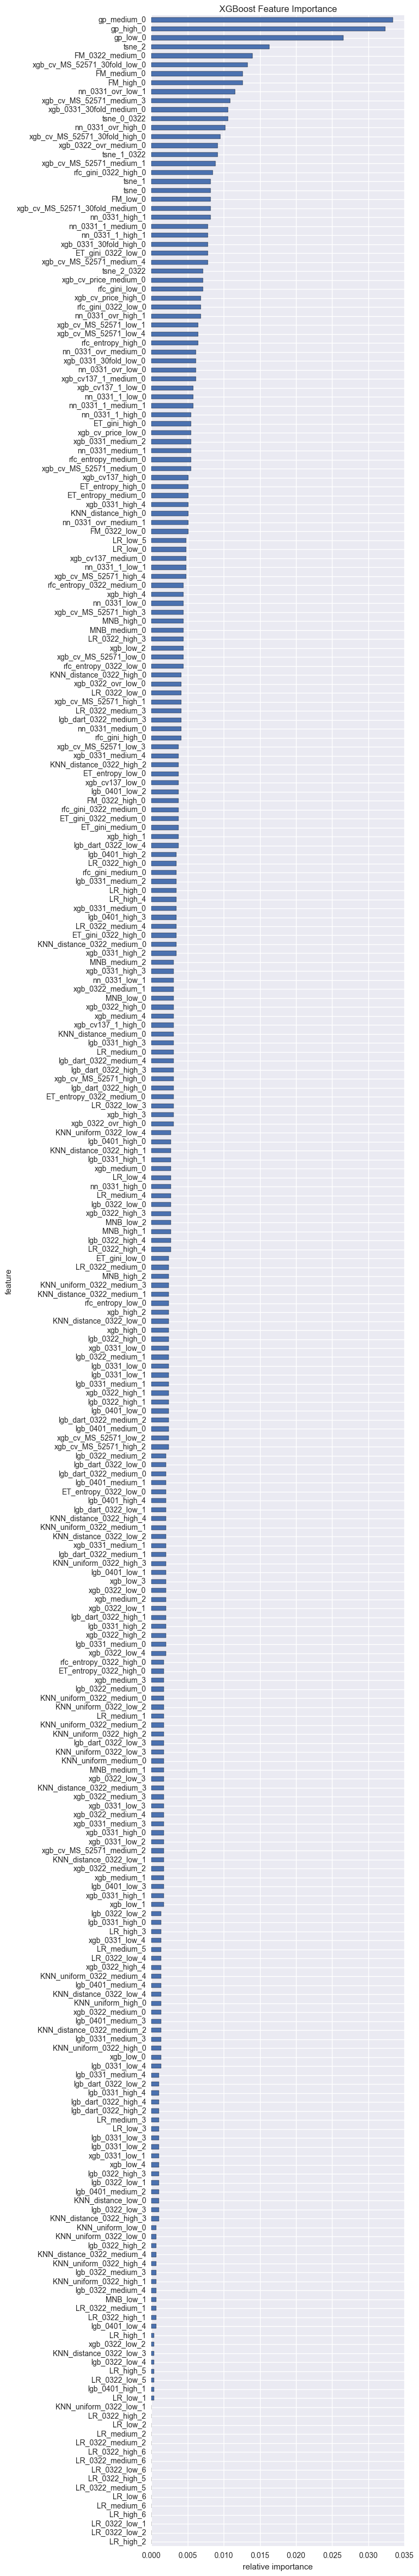

In [41]:
importance = np.vstack((X_train.columns, rgr.feature_importances_))
f_df = pd.DataFrame(importance.T, columns=['feature', 'fscore'])
f_df.fscore = f_df.fscore.astype('float64')
f_df = f_df.sort_values(by = 'fscore',ascending = True)
f_df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 60))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')

In [62]:
f_df[f_df.fscore < 1e-5].feature.values

array(['LR_high_2', 'LR_0322_low_2', 'LR_0322_low_1', 'LR_high_6',
       'LR_medium_6', 'LR_low_6', 'LR_0322_medium_5', 'LR_0322_high_5',
       'LR_0322_low_6', 'LR_0322_medium_6', 'LR_0322_high_6',
       'LR_0322_medium_2', 'LR_medium_2', 'LR_low_2', 'LR_0322_high_2',
       'KNN_uniform_0322_low_1'], dtype=object)

In [57]:
no_use = f_df.head(16).feature.values
feature_to_use = [f for f in train_2nd.columns.values if f not in no_use]

In [58]:
cv_train(train_2nd[feature_to_use],train_y, early_stop = 20,verbose_eval = 1)

[0]	train-mlogloss:0.872419+0.000380133	test-mlogloss:0.878804+0.000745467
[1]	train-mlogloss:0.740812+0.00048804	test-mlogloss:0.752761+0.00101787
[2]	train-mlogloss:0.655661+0.000430439	test-mlogloss:0.672639+0.00141948
[3]	train-mlogloss:0.597786+0.000290887	test-mlogloss:0.61951+0.00134738
[4]	train-mlogloss:0.557161+0.000442713	test-mlogloss:0.583241+0.00124568
[5]	train-mlogloss:0.527867+0.00047731	test-mlogloss:0.558073+0.00130693
[6]	train-mlogloss:0.506137+0.000488624	test-mlogloss:0.540557+0.00136317
[7]	train-mlogloss:0.489881+0.000478752	test-mlogloss:0.528205+0.00146487
[8]	train-mlogloss:0.47745+0.000500578	test-mlogloss:0.519187+0.00153513
[9]	train-mlogloss:0.467271+0.000512911	test-mlogloss:0.513019+0.00150771
[10]	train-mlogloss:0.459125+0.000488241	test-mlogloss:0.508482+0.00161917
[11]	train-mlogloss:0.452395+0.00070988	test-mlogloss:0.505249+0.00179332
[12]	train-mlogloss:0.446589+0.000623764	test-mlogloss:0.502701+0.00200319
[13]	train-mlogloss:0.441666+0.00071067

0.49678120000000003

In [74]:
# no of features = 171 => cv = 0.52101
# no of features = 168 => cv = 0.52101

In [84]:
SSL = preprocessing.StandardScaler()
for x in train_2nd.columns.values:
    scaler = SSL.fit(train_2nd[x])
    train_2nd[x] = scaler.transform(train_2nd[x]).reshape(-1, 1)
    test_2nd_mean[x] = scaler.transform(test_2nd_mean[x]).reshape(-1, 1)

D:\python\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:586: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\python\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
D:\python\Anaconda2\lib\site-packages\sklearn\preprocessing\data.py:649: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.resha

In [91]:
from gplearn.genetic import SymbolicTransformer
from gplearn.functions import make_function

In [97]:
function_set=('add', 'sub', 'mul', 'div','sqrt','log','abs','neg','inv','max','min','sin','cos','tan') 

gp = SymbolicTransformer(generations=20, population_size=2000,
                         hall_of_fame=100, n_components=10,
                         parsimony_coefficient=0.0005,
                         max_samples=0.9, verbose=1,
                         function_set = function_set,
                         metric = 'spearman',
                         random_state=0, n_jobs=-1)

In [98]:
gp.fit(X_train, y_train)

    |    Population Average   |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0      7.7   0.216796165982        2   0.630023598531   0.620702868811      4.68m
   1     3.18   0.527907914134        3   0.632393555127   0.603589372789      4.48m
   2     2.37   0.600803175108        3   0.632716678461   0.610035694037      4.32m
   3     1.79   0.608157950018        3   0.633170598812   0.606513665949      4.15m
   4     1.62   0.609788798671        3   0.633899752225   0.600203268321      3.93m
   5     1.49   0.610107068273        3   0.633427218906   0.603416604958      3.70m
   6     1.44   0.610994089358        3   0.633211372092   0.606769464432      3.45m
   7     1.21   0.620226158991        1   0.633431019329   0.594056180382      3.20m
   8     1.06   0.623710150343        1   0.633374880676   0.595337029899  

SymbolicTransformer(const_range=(-1.0, 1.0),
          function_set=('add', 'sub', 'mul', 'div', 'sqrt', 'log', 'abs', 'neg', 'inv', 'max', 'min', 'sin', 'cos', 'tan'),
          generations=20, hall_of_fame=100, init_depth=(2, 6),
          init_method='half and half', max_samples=0.9, metric='spearman',
          n_components=10, n_jobs=-1, p_crossover=0.9,
          p_hoist_mutation=0.01, p_point_mutation=0.01,
          p_point_replace=0.05, p_subtree_mutation=0.01,
          parsimony_coefficient=0.0005, population_size=2000,
          random_state=0, stopping_criteria=1.0, tournament_size=20,
          verbose=1)

In [99]:
gp_features = gp.transform(X_train)
gp_features = pd.DataFrame(gp_features,columns=['gp0','gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8','gp9'],index=X_train.index)
new_X_train = pd.concat([X_train,gp_features],axis = 1)
new_X_train.shape

(39481, 181)

In [100]:
gp_features = gp.transform(X_val)
gp_features = pd.DataFrame(gp_features,columns=['gp0','gp1','gp2','gp3','gp4','gp5','gp6','gp7','gp8','gp9'],index=X_val.index)
new_X_val = pd.concat([X_val,gp_features],axis = 1)
new_X_val.shape

(9871, 181)

In [101]:
rgr = xgb.XGBClassifier(objective = 'multi:softprob',
                       learning_rate = 0.1,
                       n_estimators = 10000,
                       nthread = -1)

rgr.fit(new_X_train,y_train,
        eval_set=[(new_X_val,y_val)],
        eval_metric='mlogloss',
#         num_class = 3,
        early_stopping_rounds=50,
        verbose=25
       )

[0]	validation_0-mlogloss:1.02195
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[25]	validation_0-mlogloss:0.550007
[50]	validation_0-mlogloss:0.524006
[75]	validation_0-mlogloss:0.521792
[100]	validation_0-mlogloss:0.521461
[125]	validation_0-mlogloss:0.521498
Stopping. Best iteration:
[93]	validation_0-mlogloss:0.521451



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=10000, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [102]:
import xgbfir
xgbfir.saveXgbFI(rgr, feature_names=X_train.columns, OutputXlsxFile = '../FE/FI2nd.xlsx')

In [40]:
# pred_y = rgr.predict_proba(test_2nd_gmean, ntree_limit = rgr.best_iteration)

In [41]:
# pred_y

In [42]:
# test_df = pd.read_csv('../input/' + 'test_BrandenMurray.csv')

# now = datetime.now()
# sub_name = '../output/sub_xgb_2nd_gmean_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'

# out_df = pd.DataFrame(pred_y[:,:3])
# out_df.columns = ["low", "medium", "high"]
# out_df["listing_id"] = test_df.listing_id.values
# out_df.to_csv(sub_name, index=False)

# Tune XGBoost

In [80]:
learning_rate = 0.1
best_score = 1000
train_param = 0
for x in [3,4,5,6,7,8,9,10]:
    rgr = xgb.XGBClassifier(
        objective='multi:softprob',
        seed = 1234, # use a fixed seed during tuning so we can reproduce the results
        learning_rate = learning_rate,
        n_estimators = 10000,
        max_depth= x,
        nthread = -1,
        silent = False
    )
    rgr.fit(
        X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
        early_stopping_rounds=50,
        verbose=False
    )
    
    if rgr.best_score < best_score:
        best_score = rgr.best_score
        train_param = x

    print x, '\t', rgr.best_score, rgr.best_iteration

3 	0.52101 99
4 	0.521015 79
5 	0.520823 71
6 	0.522399 75
7 	0.523542 66
8 	0.524821 70
9 	0.527566 58
10 	0.528632 50


In [81]:
for x in [1,2]:
    rgr = xgb.XGBClassifier(
        objective='multi:softprob',
        seed = 1234, # use a fixed seed during tuning so we can reproduce the results
        learning_rate = learning_rate,
        n_estimators = 10000,
        max_depth= x,
        nthread = -1,
        silent = False
    )
    rgr.fit(
        X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
        early_stopping_rounds=50,
        verbose=False
    )
    
    if rgr.best_score < best_score:
        best_score = rgr.best_score
        train_param = x

    print x, '\t', rgr.best_score, rgr.best_iteration

1 	0.52184 480
2 	0.521393 116


In [82]:
max_depth = train_param
print train_param

5


In [83]:
train_param = 1
for x in [2,4,8,16,20,24,28,32]:
    rgr = xgb.XGBClassifier(
        objective='multi:softprob',
        seed = 1234, # use a fixed seed during tuning so we can reproduce the results
        learning_rate = learning_rate,
        n_estimators = 10000,
        max_depth= max_depth,
        nthread = -1,
        silent = False,
        min_child_weight = x
    )
    rgr.fit(
        X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
        early_stopping_rounds=50,
        verbose=False
    )
    
    if rgr.best_score < best_score:
        best_score = rgr.best_score
        train_param = x
        

    print x, '\t', rgr.best_score, rgr.best_iteration

2 	0.520726 81
4 	0.521239 80
8 	0.522044 78
16 	0.521959 76
20 	0.521878 79
24 	0.521774 73
28 	0.521217 77
32 	0.521688 69


In [84]:
min_child_weight = train_param
print min_child_weight

2


In [131]:
train_param = 1
for x in [0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    rgr = xgb.XGBClassifier(
        objective='multi:softprob',
        seed = 1234, # use a fixed seed during tuning so we can reproduce the results
        learning_rate = learning_rate,
        n_estimators = 10000,
        max_depth= max_depth,
        nthread = -1,
        silent = False,
        min_child_weight = min_child_weight,
        colsample_bytree = x
    )
    rgr.fit(
        X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
        early_stopping_rounds=50,
        verbose=False
    )

    if rgr.best_score < best_score:
        best_score = rgr.best_score
        train_param = x
        

    print x, '\t', rgr.best_score, rgr.best_iteration

0.3 	0.52226 221
0.4 	0.522604 115
0.5 	0.522386 151
0.6 	0.522382 159
0.7 	0.522335 160
0.8 	0.52219 159
0.9 	0.522377 162


In [132]:
colsample_bytree = train_param
print train_param

0.8


In [133]:
train_param = 1
for x in [0.5,0.6,0.7,0.8,0.9]:
    rgr = xgb.XGBClassifier(
        objective='multi:softprob',
        seed = 1234, # use a fixed seed during tuning so we can reproduce the results
        learning_rate = learning_rate,
        n_estimators = 10000,
        max_depth= max_depth,
        nthread = -1,
        silent = False,
        min_child_weight = min_child_weight,
        colsample_bytree = colsample_bytree,
        subsample = x
    )
    rgr.fit(
        X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
        early_stopping_rounds=50,
        verbose=False
    )
    if rgr.best_score < best_score:
        best_score = rgr.best_score
        train_param = x
        

    print x, '\t', rgr.best_score, rgr.best_iteration

0.5 	0.522391 106
0.6 	0.522022 114
0.7 	0.521796 155
0.8 	0.522082 156
0.9 	0.522189 137


In [134]:
subsample = train_param
print train_param

0.7


In [135]:
train_param = 0
for x in [0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0]:
    rgr = xgb.XGBClassifier(
        objective='multi:softprob',
        seed = 1234, # use a fixed seed during tuning so we can reproduce the results
        learning_rate = learning_rate,
        n_estimators = 10000,
        max_depth= max_depth,
        nthread = -1,
        silent = False,
        min_child_weight = min_child_weight,
        colsample_bytree = colsample_bytree,
        subsample = subsample,
        gamma = x
    )
    rgr.fit(
        X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
        early_stopping_rounds=50,
        verbose=False
    )

    if rgr.best_score < best_score:
        best_score = rgr.best_score
        train_param = x
        

    print x, '\t', rgr.best_score, rgr.best_iteration

0.3 	0.521587 229
0.6 	0.521889 155
0.9 	0.521672 229
1.2 	0.521809 185
1.5 	0.521477 229
1.8 	0.521727 155
2.1 	0.521937 155
2.4 	0.521896 155
2.7 	0.521784 227
3.0 	0.522045 155


In [136]:
gamma = train_param
print gamma

1.5


In [137]:
rgr = xgb.XGBClassifier(
    objective='multi:softprob',
    seed = 1234, # use a fixed seed during tuning so we can reproduce the results
    learning_rate = learning_rate,
    n_estimators = 10000,
    max_depth= max_depth,
    nthread = -1,
    silent = False,
    min_child_weight = min_child_weight,
    colsample_bytree = colsample_bytree,
    subsample = subsample,
    gamma = gamma
)
rgr.fit(X_train,y_train,
        eval_set=[(X_val,y_val)],
        eval_metric='mlogloss',
#         num_class = 3,
        early_stopping_rounds=50,
        verbose=25
       )

[0]	validation_0-mlogloss:1.02329
Will train until validation_0-mlogloss hasn't improved in 50 rounds.
[25]	validation_0-mlogloss:0.553328
[50]	validation_0-mlogloss:0.526073
[75]	validation_0-mlogloss:0.522986
[100]	validation_0-mlogloss:0.522024
[125]	validation_0-mlogloss:0.521917
[150]	validation_0-mlogloss:0.521824
[175]	validation_0-mlogloss:0.521716
[200]	validation_0-mlogloss:0.521808
[225]	validation_0-mlogloss:0.521579
[250]	validation_0-mlogloss:0.521706
[275]	validation_0-mlogloss:0.521784
Stopping. Best iteration:
[229]	validation_0-mlogloss:0.521477



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=1.5, learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=8, missing=None, n_estimators=10000, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=1234, silent=False, subsample=0.7)

In [138]:
pred_y = rgr.predict_proba(test_2nd_mean, ntree_limit = rgr.best_iteration)
test_df = pd.read_csv('../input/' + 'test_BrandenMurray.csv')

now = datetime.now()
sub_name = '../output/sub_xgb_2nd_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'

out_df = pd.DataFrame(pred_y[:,:3])
out_df.columns = ["low", "medium", "high"]
out_df["listing_id"] = test_df.listing_id.values
out_df.to_csv(sub_name, index=False)